In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv("Height-Weight Data.csv")

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [5]:
df.isnull().head()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [8]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0.5, 1.0, 'This is an assignment')

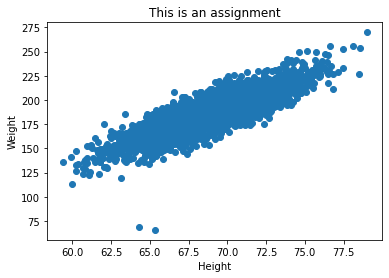

In [9]:
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("This is an assignment")

In [10]:
df.Weight.mean()

186.89125797946284

In [11]:
df.Height.mean()

69.02441087268797

In [12]:
x = df[['Height']]
y = df['Weight']

In [13]:
x.shape, y.shape

((3501, 1), (3501,))

# Split Data into Train Test Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.70,random_state=0)

In [16]:
ytrain.head()

2253    165.862943
2376    178.287786
808     191.968178
1510    185.687955
656     185.127736
Name: Weight, dtype: float64

In [17]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [18]:
xtrain.head()

,Height
2253,65.094065
2376,68.953719
808,70.780936
1510,67.985975
656,68.410463


In [19]:
xtest.shape, ytest.shape

((2451, 1), (2451,))

In [20]:
print(xtest.shape)
print(ytest.shape)

if xtest.shape[0] != ytest.shape[0]:
  print("x and y rows are mismatched, check dataset again")

(2451, 1)
(2451,)


In [21]:
xtrain.shape, ytrain.shape

((1050, 1), (1050,))

# Linear Regression 

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [24]:
m = lr.coef_

In [25]:
m

array([5.98011693])

In [26]:
c = lr.intercept_
c

-226.05155226932874

In [27]:
x1 = 70.780936
y = m * x1 + c

In [28]:
y

array([197.22672172])

In [29]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [30]:
x2=74.110105
y = m * x1 + c

In [31]:
y

array([197.22672172])

In [32]:
df['Predicted Values'] = lr.predict(x)

In [33]:
df.head(10)

,Height,Weight,Predicted Values
0,73.847017,241.893563,215.562245
1,68.781904,162.310473,185.272277
2,74.110105,212.740856,217.135544
3,71.730978,220.042470,202.908086
4,69.881796,206.349801,191.849759
5,67.253016,152.212156,176.129346
6,68.785081,183.927889,185.291277
7,68.348516,167.971111,182.680563
8,67.018950,175.929440,174.729603
9,63.456494,156.399676,153.425702


In [34]:
lr.score(xtest,ytest)

0.7389692118286029

# Mean squard Error

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(df.Weight, df['Predicted Values'])

In [37]:
mse

106.02411774388187

# Mean Absolute Error

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mae = mean_absolute_error(df.Weight, df['Predicted Values'])

In [40]:
mae

8.07067685667054

# Accuracy Score

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [3501, 1]